<a href="https://colab.research.google.com/github/meherashish2004/DV_A3/blob/main/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
from copy import deepcopy

In [7]:
df = pd.read_csv('/content/drive/MyDrive/A3_DV/movie_dataset.csv')

In [8]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [9]:
df.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [10]:
df.drop(columns=['homepage','keywords','crew','tagline','overview','tagline','cast'],inplace=True)

In [11]:
df = df.dropna()

In [ ]:
genre_list = deepcopy(df['genres'].tolist())
genre_split_list = []
for genres in genre_list:
    try:
        genre_split_list.append( list(genres.split()))
    except:
        print(genres)

genre_split_list

In [13]:
# getting a set of all genres
all_genres = []
for element in genre_split_list:
    for genre in element:
        all_genres.append(genre)

all_genres = set(all_genres)
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Fiction',
 'Foreign',
 'History',
 'Horror',
 'Movie',
 'Music',
 'Mystery',
 'Romance',
 'Science',
 'TV',
 'Thriller',
 'War',
 'Western'}

In [14]:
genre_columns = {}
for genre in all_genres:
    genre_columns[genre] = []
genre_columns

{'Adventure': [],
 'Fantasy': [],
 'Family': [],
 'History': [],
 'Foreign': [],
 'Drama': [],
 'Romance': [],
 'Comedy': [],
 'Action': [],
 'Fiction': [],
 'TV': [],
 'Horror': [],
 'Science': [],
 'Western': [],
 'Music': [],
 'War': [],
 'Crime': [],
 'Thriller': [],
 'Mystery': [],
 'Documentary': [],
 'Movie': [],
 'Animation': []}

In [ ]:
for split in genre_split_list:
    for gen in all_genres:
        if gen in split:
            genre_columns[gen].append(1)
        else:
            genre_columns[gen].append(0)

genre_columns

In [16]:
for gen in all_genres:
    df[gen] = genre_columns[gen]


In [17]:
df.head()

,index,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,...,Science,Western,Music,War,Crime,Thriller,Mystery,Documentary,Movie,Animation
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,1,0,0,0,0,0,0,0,0,0
1,1,300000000,Adventure Fantasy Action,285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,0,0,0,0,0,0,0,0,0,0
2,2,245000000,Action Adventure Crime,206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,0,0,0,0,1,0,0,0,0,0
3,3,250000000,Action Crime Drama Thriller,49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,0,0,0,0,1,1,0,0,0,0
4,4,260000000,Action Adventure Science Fiction,49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,...,1,0,0,0,0,0,0,0,0,0


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

## Visualization-1 Genre vs Revenue

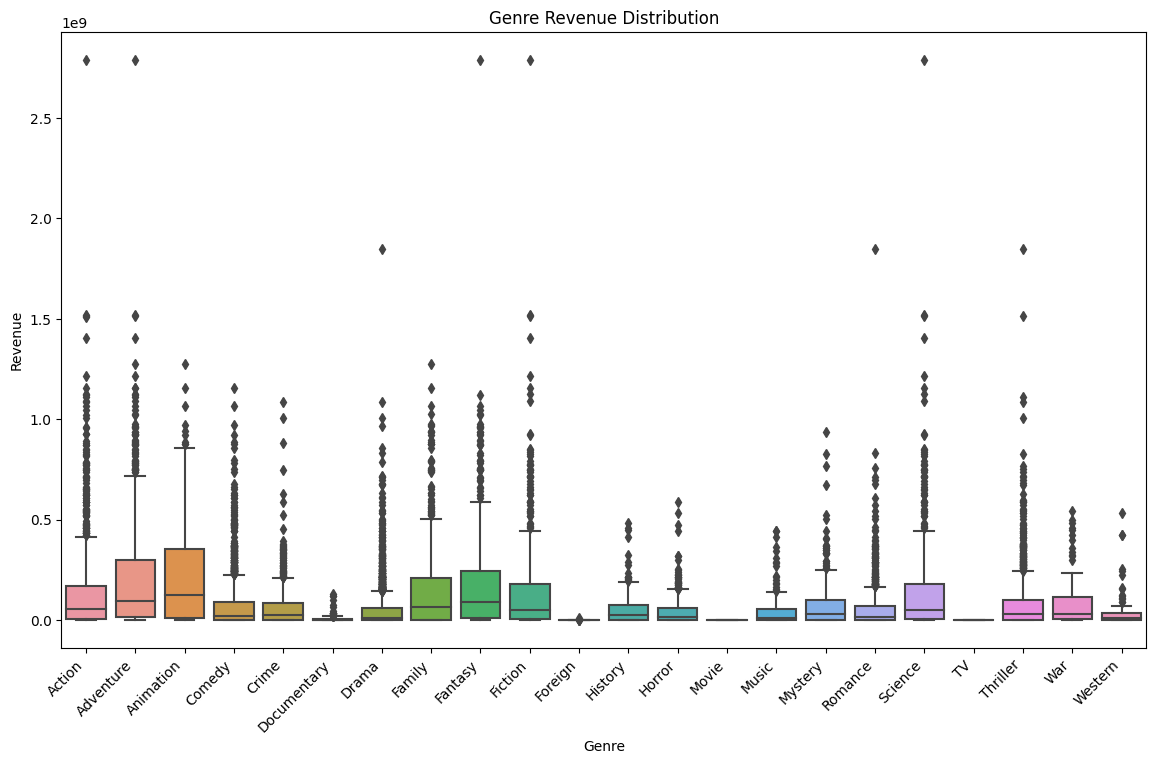

In [19]:


# Assuming 'df' is your DataFrame with genre columns and 'revenue'
genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
          'Family', 'Fantasy', 'Fiction', 'Foreign', 'History', 'Horror', 'Movie',
          'Music', 'Mystery', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western']

# Melt the DataFrame to have 'genre' and 'revenue' columns
df_melted = pd.melt(df, id_vars=['revenue'], value_vars=genres, var_name='genre', value_name='genre_flag')

# Filter only rows where the genre_flag is 1 (indicating the movie belongs to that genre)
df_filtered = df_melted[df_melted['genre_flag'] == 1]

# Boxplot for Genre Revenue Distribution
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, x='genre', y='revenue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Genre Revenue Distribution')
plt.show()


In [20]:
#Finding Statistics of revenue for different genres
mean_revenue = []
for genre in genres:
  mean = df[genre].mean()
  mean_revenue.append({genre,mean})
mean_revenue

[{0.24195921799453438, 'Action'},
 {0.16607105318478033, 'Adventure'},
 {0.04898044986335926, 'Animation'},
 {0.3605213369770864, 'Comedy'},
 {0.14610048349800295, 'Crime'},
 {0.02249316796300189, 'Documentary'},
 {0.4813958377128442, 'Drama'},
 {0.10636956064746689, 'Family'},
 {0.08787050662182047, 'Fantasy'},
 {0.11120454067689721, 'Fiction'},
 {0.006726928736598697, 'Foreign'},
 {0.041412655034685726, 'History'},
 {0.1088921589236914, 'Horror'},
 {0.0016817321841496743, 'Movie'},
 {0.038259407189405084, 'Music'},
 {0.07273491696447341, 'Mystery'},
 {0.18667227244061382, 'Romance'},
 {0.11120454067689721, 'Science'},
 {0.0016817321841496743, 'TV'},
 {0.2644523859575363, 'Thriller'},
 {0.029850746268656716, 'War'},
 {0.01681732184149674, 'Western'}]

In [21]:
genre_stats = pd.DataFrame(index=['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max'])

# Calculate statistics for each genre
for genre in genres:
    genre_revenue = df.loc[df[genre] == 1, 'revenue']
    genre_stats[genre] = genre_revenue.describe()

# Display the calculated statistics
print(genre_stats)

              Action     Adventure     Animation        Comedy         Crime  \
mean    1.414888e+08  2.086602e+08  2.266569e+08  7.158048e+07  6.624584e+07   
median           NaN           NaN           NaN           NaN           NaN   
std     2.310340e+08  2.846066e+08  2.631299e+08  1.271554e+08  1.108709e+08   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     5.790388e+06  1.723364e+07  8.109160e+06  0.000000e+00  2.802940e+05   
50%     5.468255e+07  9.593940e+07  1.225635e+08  1.751917e+07  2.426157e+07   
75%     1.703978e+08  3.002256e+08  3.542481e+08  9.042496e+07  8.386656e+07   
max     2.787965e+09  2.787965e+09  1.274219e+09  1.156731e+09  1.084939e+09   

         Documentary         Drama        Family       Fantasy       Fiction  \
mean    1.011474e+07  5.227554e+07  1.630237e+08  1.938885e+08  1.536834e+08   
median           NaN           NaN           NaN           NaN           NaN   
std     2.471405e+07  1.089628e+08  2.3

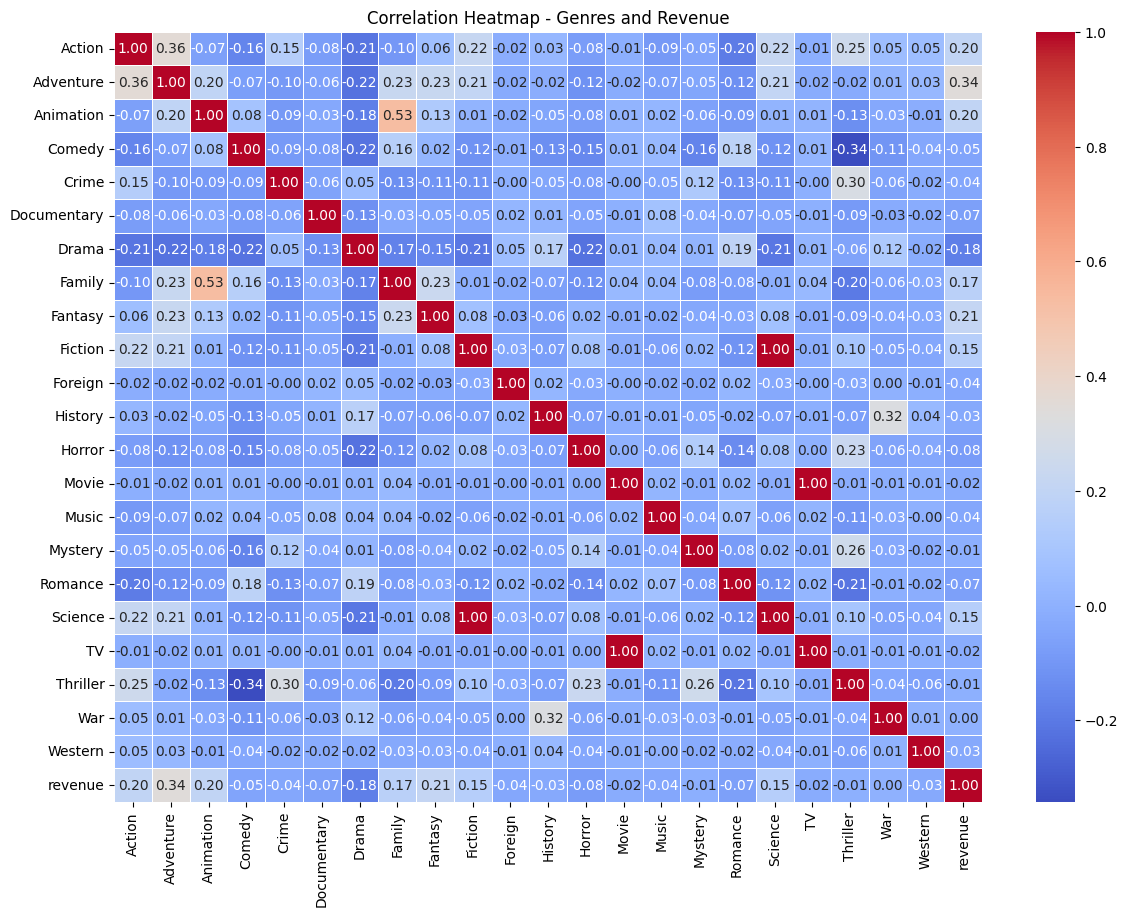

In [22]:
correlation_matrix = df[genres + ['revenue']].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Genres and Revenue')
plt.show()

In [23]:
# Identify the most common genres or those with high average revenue
top_genres = df[genres].mean().sort_values(ascending=False).head(5).index




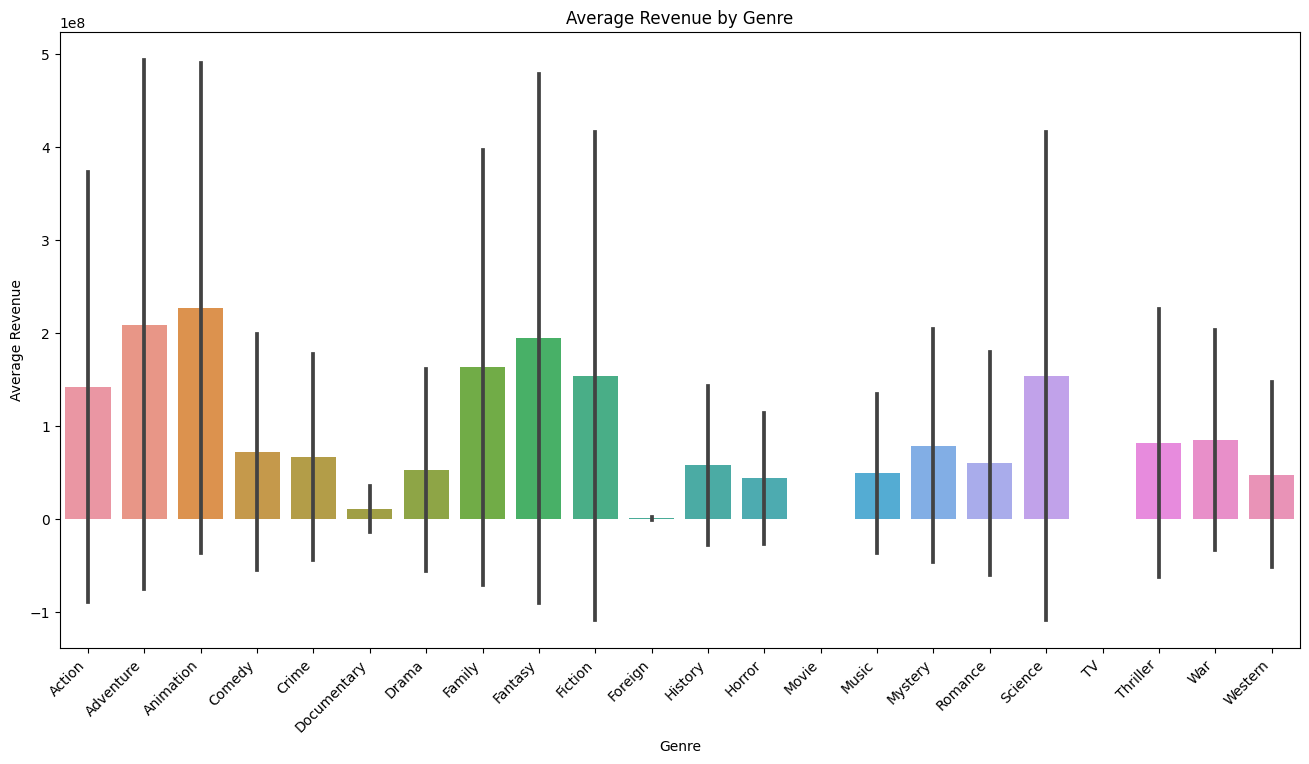

In [24]:
df_melted = pd.melt(df, id_vars=['revenue'], value_vars=genres, var_name='genre', value_name='genre_flag')

# Filter only rows where the genre_flag is 1 (indicating the movie belongs to that genre)
df_filtered = df_melted[df_melted['genre_flag'] == 1]

# Create a bar chart for Average Revenue by Genre
plt.figure(figsize=(16, 8))
sns.barplot(data=df_filtered, x='genre', y='revenue', errorbar='sd')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

## Vizualization-2 Director vs Revenue

In [25]:
director_revenue = df.groupby('director')['revenue'].sum().reset_index()

# Display the new DataFrame with director and total revenue
print(director_revenue)

                     director   revenue
0                  Aaron Hann         0
1             Aaron Schneider         0
2                Abel Ferrara   1227324
3                 Adam Brooks  55447968
4                Adam Carolla         0
...                       ...       ...
2331         \u00c0lex Pastor   5802422
2332  \u00c1lex de la Iglesia         0
2333    \u00c9mile Gaudreault   3031801
2334        \u00c9ric Tessier         0
2335       \u00c9tienne Faure         0

[2336 rows x 2 columns]


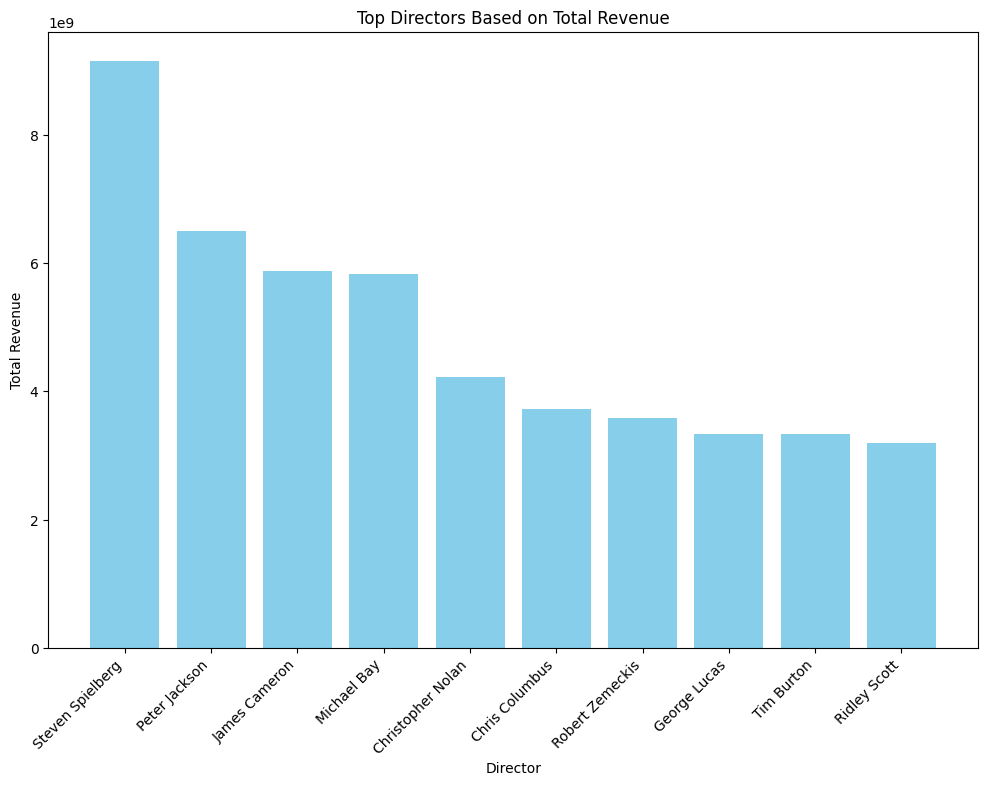

In [26]:
director_revenue_sorted = director_revenue.sort_values(by='revenue', ascending=False)

# Select the top N directors (adjust N based on your preference)
top_directors = director_revenue_sorted.head(10)  # Selecting the top 10 directors for example

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_directors['director'], top_directors['revenue'], color='skyblue')
plt.xlabel('Director')
plt.ylabel('Total Revenue')
plt.title('Top Directors Based on Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

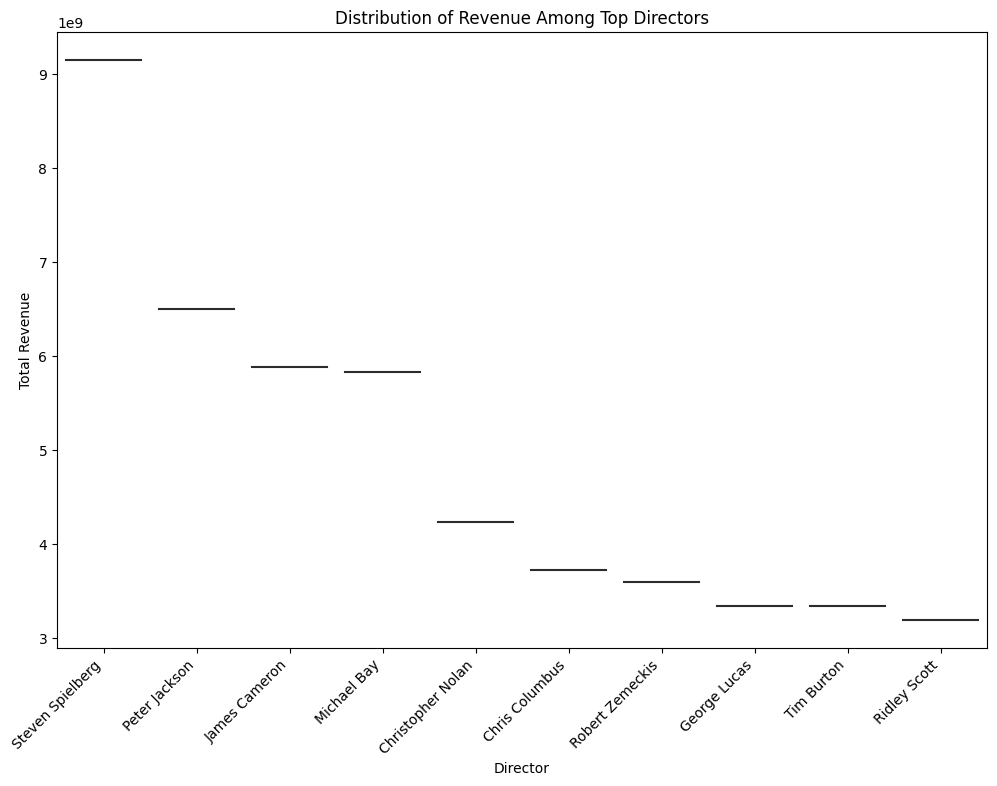

In [27]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='director', y='revenue', data=top_directors, palette='viridis')
plt.xlabel('Director')
plt.ylabel('Total Revenue')
plt.title('Distribution of Revenue Among Top Directors')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
 director_revenue_sorted['revenue'].head()


2100    9147393164
1729    6498642820
883     5883569439
1477    5832524638
360     4227483234
Name: revenue, dtype: int64

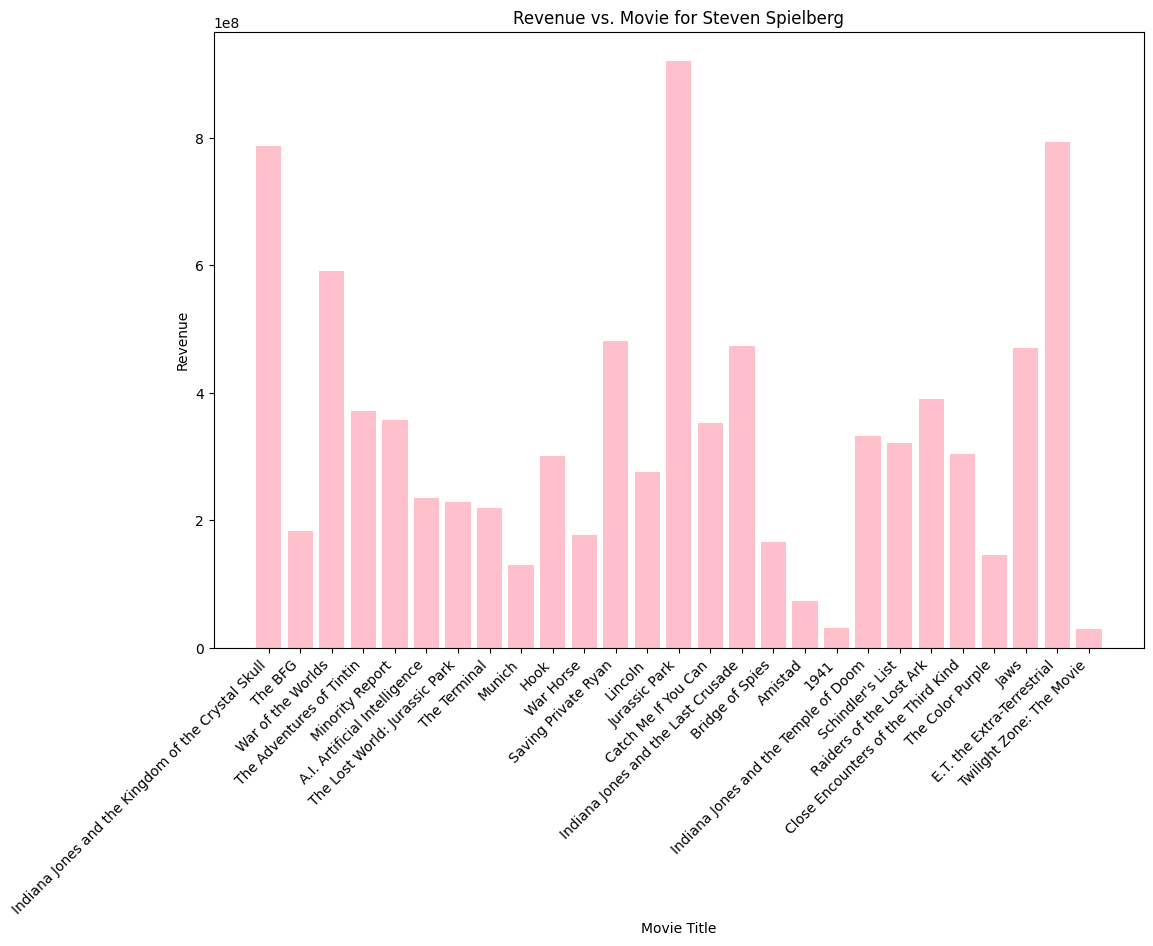

In [29]:


# Assuming 'df' is your DataFrame with columns 'director', 'revenue', and 'original_title'
#director_name = "Christopher Nolan"  # Replace with the desired director's name
director_name = "Steven Spielberg"
# Filter the DataFrame for the specific director
director_movies = df[df['director'] == director_name]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(director_movies['original_title'], director_movies['revenue'], color='pink')
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.title(f'Revenue vs. Movie for {director_name}')
plt.xticks(rotation=45, ha='right')
plt.show()


In [31]:
df.head()

,index,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,...,Science,Western,Music,War,Crime,Thriller,Mystery,Documentary,Movie,Animation
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,1,0,0,0,0,0,0,0,0,0
1,1,300000000,Adventure Fantasy Action,285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,0,0,0,0,0,0,0,0,0,0
2,2,245000000,Action Adventure Crime,206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,0,0,0,0,1,0,0,0,0,0
3,3,250000000,Action Crime Drama Thriller,49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,0,0,0,0,1,1,0,0,0,0
4,4,260000000,Action Adventure Science Fiction,49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
! pip install upsetplot

In [ ]:
df.head()

In [ ]:
from upsetplot import from_memberships
movies_by_genre = from_memberships(df.genres.str.split(' '), data=df)
movies_by_genre = movies_by_genre.sort_values(by="revenue",ascending=False)
movies_by_genre = movies_by_genre.head(10)
movies_by_genre

In [ ]:
from upsetplot import UpSet
UpSet(movies_by_genre)